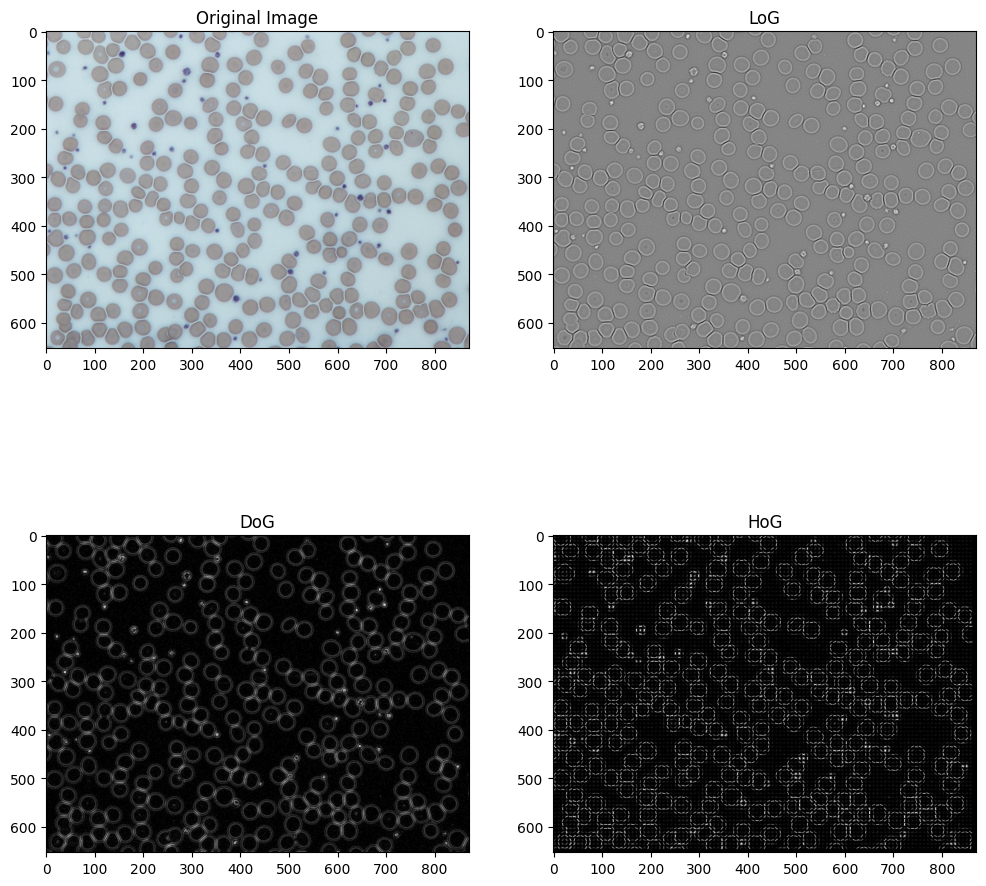

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import hog
from skimage import exposure

# Load the platelet image
img = cv2.imread('/content/platelets.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray = np.squeeze(gray)

### 1. LoG (Laplacian of Gaussian)
log = cv2.GaussianBlur(gray, (5, 5), 0)
log = cv2.Laplacian(log, cv2.CV_64F)

### 2. DoG (Difference of Gaussian)
gauss1 = cv2.GaussianBlur(gray, (5, 5), 0)
gauss2 = cv2.GaussianBlur(gray, (9, 9), 0)
dog = cv2.absdiff(gauss1, gauss2)

# HoG (Histogram of Oriented Gradients)
fd, hog_image = hog(gray, orientations=9, pixels_per_cell=(8, 8),
                     cells_per_block=(2, 2), visualize=True)  # Removed channel_axis
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

# Display the results
fig, axs = plt.subplots(2, 2, figsize=(12, 12))
axs[0, 0].imshow(img[..., ::-1])
axs[0, 0].set_title("Original Image")
axs[0, 1].imshow(log, cmap='gray')
axs[0, 1].set_title("LoG")
axs[1, 0].imshow(dog, cmap='gray')
axs[1, 0].set_title("DoG")
axs[1, 1].imshow(hog_image_rescaled, cmap='gray')
axs[1, 1].set_title("HoG")
plt.show()

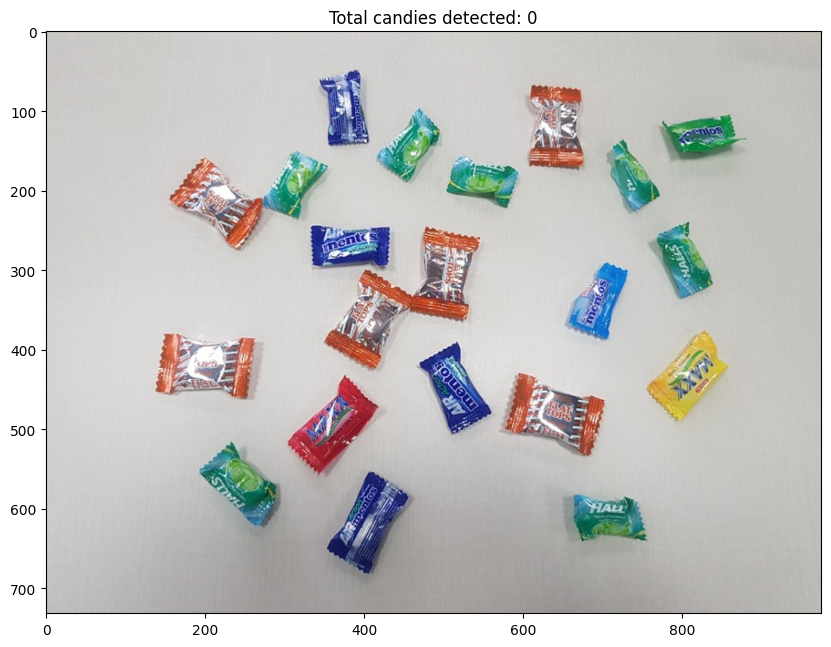

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load candy image
candy_img = cv2.imread('/content/candy.jpg')
gray_candy = cv2.cvtColor(candy_img, cv2.COLOR_BGR2GRAY)

# Apply Gaussian Blur
blur = cv2.GaussianBlur(gray_candy, (7, 7), 0)

# Set up SimpleBlobDetector parameters
params = cv2.SimpleBlobDetector_Params()
params.filterByArea = True
params.minArea = 700  # Minimum size of blob
params.maxArea = 5000 # Maximum size of blob
params.filterByCircularity = True
params.minCircularity = 0.2  # Adjust based on candy shape
params.filterByConvexity = True  # Disable convexity filtering
params.filterByInertia = True    # Disable inertia filtering

# Create a detector with the parameters
detector = cv2.SimpleBlobDetector_create(params)

# Detect blobs
keypoints = detector.detect(blur)

# Draw blobs as red circles
blob_img = cv2.drawKeypoints(candy_img, keypoints, np.array([]), (0, 0, 255), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# Display detected blobs
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(blob_img, cv2.COLOR_BGR2RGB))
plt.title(f'Total candies detected: {len(keypoints)}')
plt.show()


In [ ]:
!wget -O ESPCN_x4.pb https://github.com/fannymonori/TF-ESPCN/blob/master/export/ESPCN_x4.pb


--2025-04-08 05:57:11--  https://github.com/fannymonori/TF-ESPCN/blob/master/export/ESPCN_x4.pb
Resolving github.com (github.com)... 140.82.116.4
Connecting to github.com (github.com)|140.82.116.4|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘ESPCN_x4.pb’

ESPCN_x4.pb             [ <=>                ] 203.98K  --.-KB/s    in 0.03s   

2025-04-08 05:57:12 (7.05 MB/s) - ‘ESPCN_x4.pb’ saved [208878]



In [ ]:
!pip install opencv-contrib-python

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.1/69.1 MB 11.0 MB/s eta 0:00:00


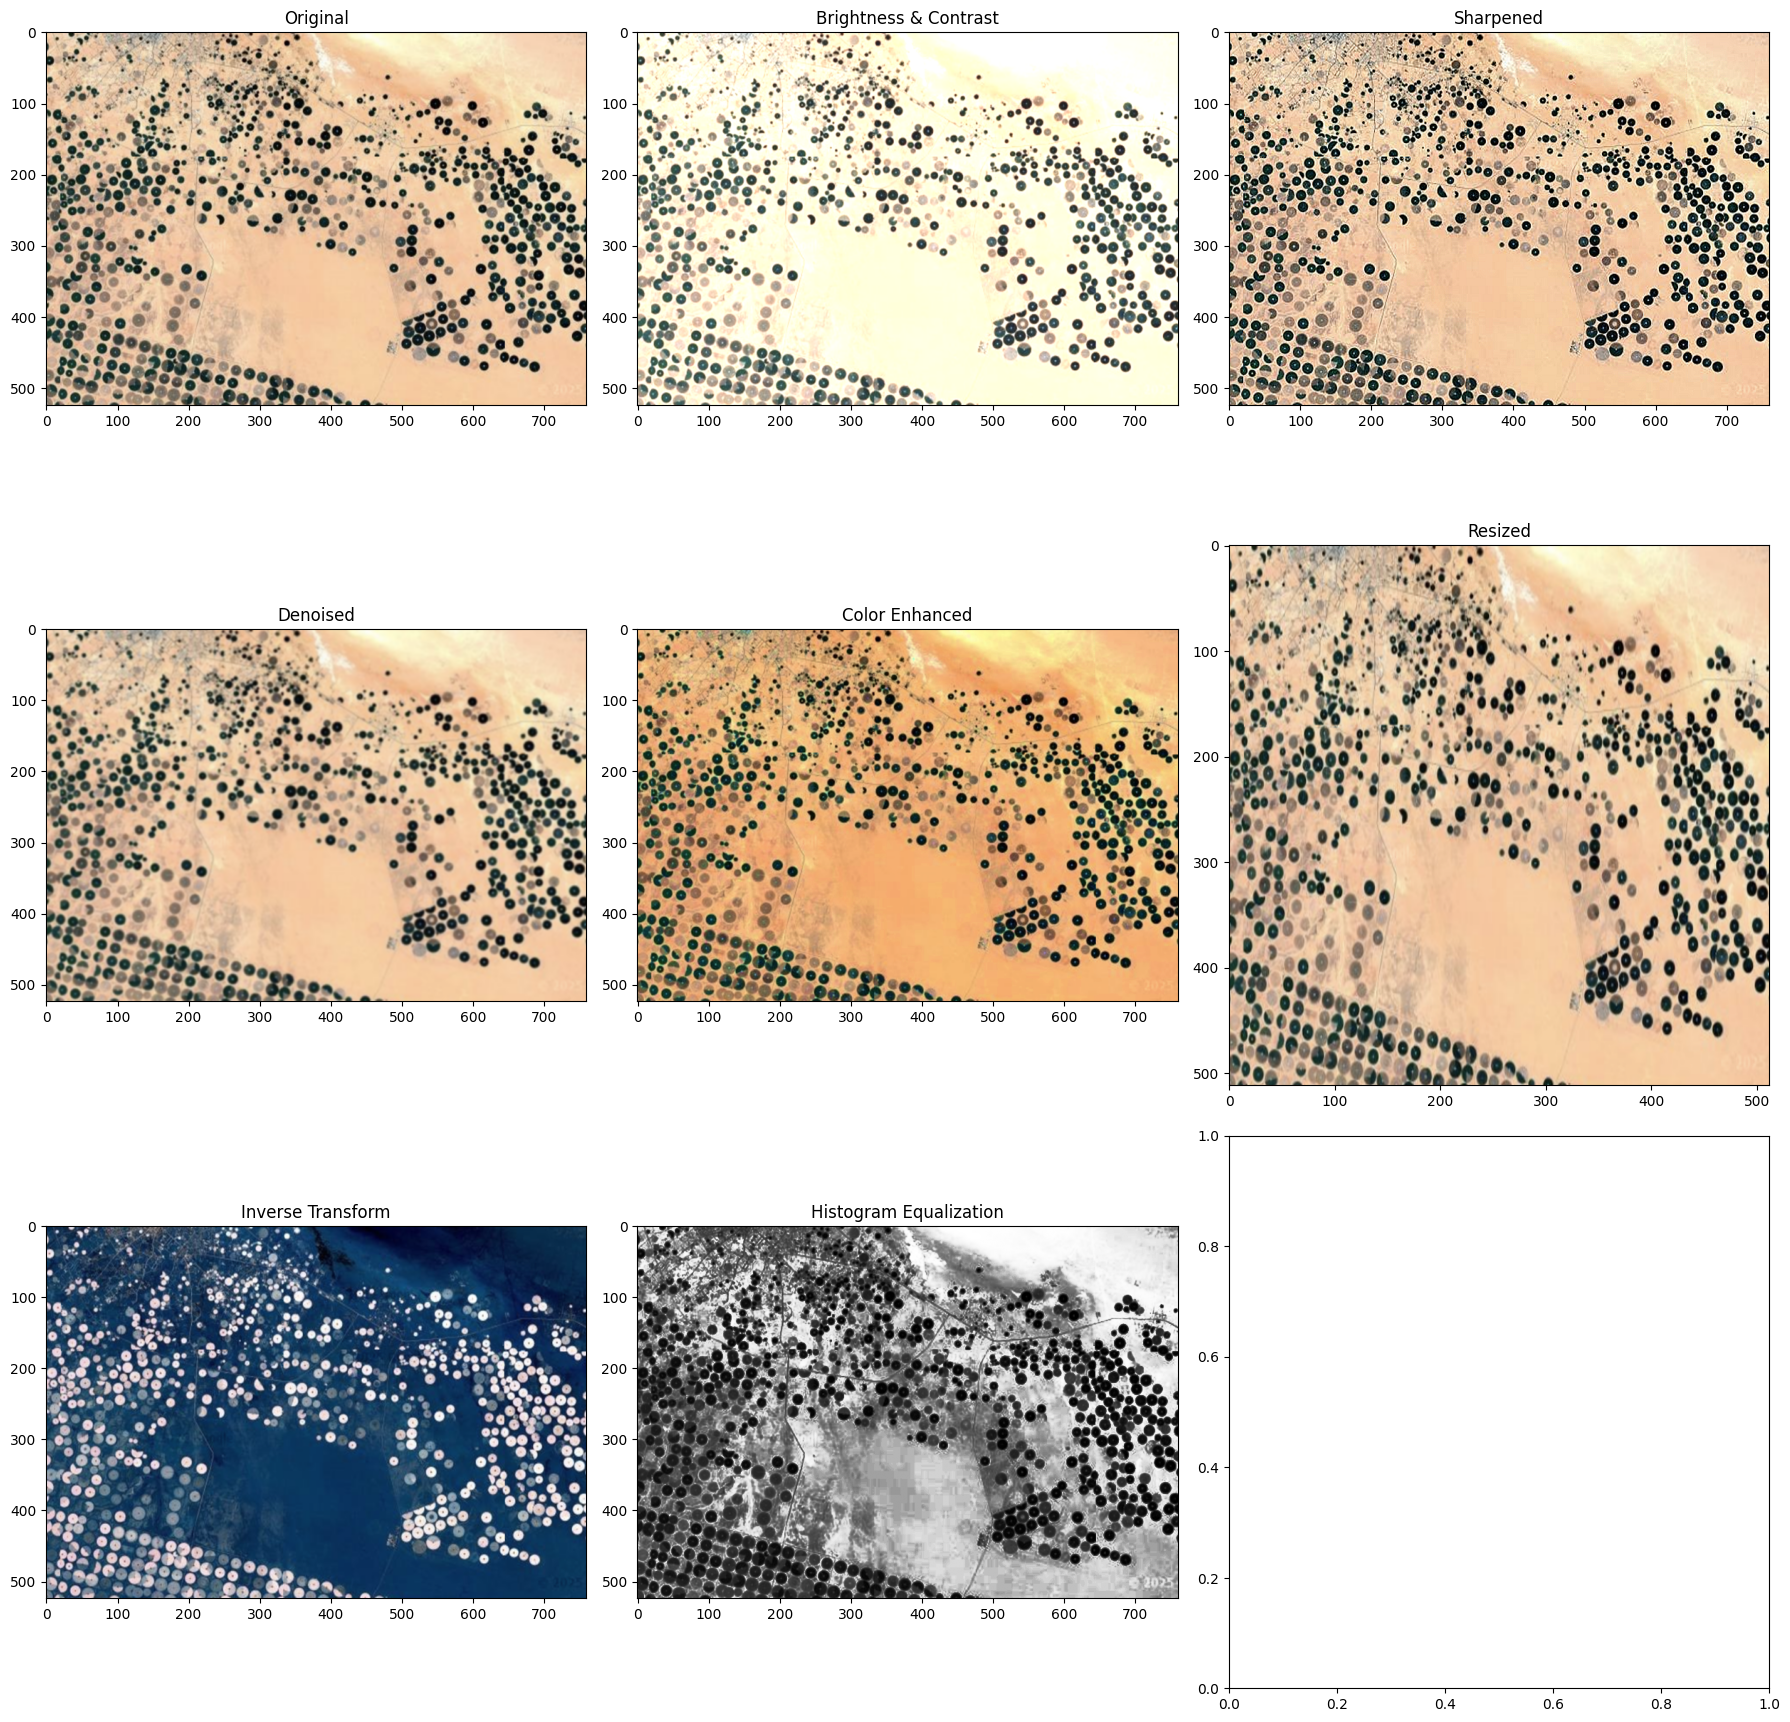

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load Satellite Image
sat_img = cv2.imread('/content/satellite.png')
sat_img = cv2.cvtColor(sat_img, cv2.COLOR_BGR2RGB)

# 1. Brightness and Contrast Adjustment
bright_contrast = cv2.convertScaleAbs(sat_img, alpha=1.2, beta=30)

# 2. Sharpening
kernel = np.array([[0, -1, 0],
                   [-1, 5, -1],
                   [0, -1, 0]])
sharpened = cv2.filter2D(sat_img, -1, kernel)

# 3. Noise Removal (Gaussian Blur)
denoised = cv2.GaussianBlur(sat_img, (5, 5), 0)

# 4. Color Enhancement
enhanced = cv2.cvtColor(sat_img, cv2.COLOR_RGB2HSV)
enhanced[:, :, 1] = cv2.add(enhanced[:, :, 1], 50)
enhanced = cv2.cvtColor(enhanced, cv2.COLOR_HSV2RGB)

# 5. Image Resizing and Scaling
resized = cv2.resize(sat_img, (512, 512))

# 6. Inverse Transform
inverse = cv2.bitwise_not(sat_img)

# 7. Histogram Equalization
gray_eq = cv2.cvtColor(sat_img, cv2.COLOR_RGB2GRAY)
hist_eq = cv2.equalizeHist(gray_eq)

# Plot all enhancements including Super-resolution
fig, axes = plt.subplots(3, 3, figsize=(18, 18))

axes[0, 0].imshow(sat_img)
axes[0, 0].set_title('Original')

axes[0, 1].imshow(bright_contrast)
axes[0, 1].set_title('Brightness & Contrast')

axes[0, 2].imshow(sharpened)
axes[0, 2].set_title('Sharpened')

axes[1, 0].imshow(denoised)
axes[1, 0].set_title('Denoised')

axes[1, 1].imshow(enhanced)
axes[1, 1].set_title('Color Enhanced')

axes[1, 2].imshow(resized)
axes[1, 2].set_title('Resized')

axes[2, 0].imshow(inverse)
axes[2, 0].set_title('Inverse Transform')

axes[2, 1].imshow(hist_eq, cmap='gray')
axes[2, 1].set_title('Histogram Equalization')

# # Add the super-resolution image
# axes[2, 2].imshow(upscaled)
# axes[2, 2].set_title('Super-resolution (Upscaled)')

plt.tight_layout()
plt.show()

Image Classification using AlexNet and VGG16 on Cifar-100

In [ ]:

import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import cifar100
from tensorflow.keras.optimizers import Adam
import time

# Load CIFAR-100 dataset
(x_train, y_train), (x_test, y_test) = cifar100.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0


169001437/169001437 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [ ]:
import torch
import torchvision.models as models

# Load pretrained AlexNet
alexnet = models.alexnet(pretrained=True)
alexnet.eval()

# Display model architecture
print(alexnet)


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth
100%|██████████| 233M/233M [00:02<00:00, 108MB/s]


AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [ ]:
vgg_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
x = Flatten()(vgg_model.output)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(100, activation='softmax')(x)
vgg = Model(inputs=vgg_model.input, outputs=output)

vgg.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
start_time = time.time()
vgg.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10)
vgg_time = time.time() - start_time


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 88s 48ms/step - accuracy: 0.0099 - loss: 4.6187 - val_accuracy: 0.0100 - val_loss: 4.6052
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 124s 42ms/step - accuracy: 0.0089 - loss: 4.6057 - val_accuracy: 0.0100 - val_loss: 4.6052
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 42ms/step - accuracy: 0.0096 - loss: 4.6056 - val_accuracy: 0.0100 - val_loss: 4.6052
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 42ms/step - accuracy: 0.0101 - loss: 4.6056 - val_accuracy: 0.0100 - val_loss: 4.6052
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 42ms/step - accuracy: 0.0093 - loss: 4.6057 - val_accuracy: 0.0100 - val_loss: 4.6052
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 42ms/step - accuracy: 0.0105 - loss: 4.6056 - val_accuracy: 0.0100 - val_loss: 4.6052
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 41ms/step - accuracy: 0.0088 - loss: 4.6056 - val_accuracy: 0.0100 - val_loss: 4.6052
Epoch 8/10
1563/1563 ━━━

In [ ]:
# Define and Train AlexNet
alex_model = tf.keras.applications.MobileNetV2(input_shape=(32, 32, 3), include_top=False)
x = Flatten()(alex_model.output)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(100, activation='softmax')(x)
alexnet = Model(inputs=alex_model.input, outputs=output)

alexnet.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
start_time = time.time()
alexnet.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10)
alexnet_time = time.time() - start_time


<ipython-input-4-221a271b8221>:2: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  alex_model = tf.keras.applications.MobileNetV2(input_shape=(32, 32, 3), include_top=False)


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 87s 28ms/step - accuracy: 0.0596 - loss: 4.3395 - val_accuracy: 0.0331 - val_loss: 6.8608
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 23s 15ms/step - accuracy: 0.1492 - loss: 3.4728 - val_accuracy: 0.0368 - val_loss: 4.5785
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 38s 13ms/step - accuracy: 0.1779 - loss: 3.3230 - val_accuracy: 0.0710 - val_loss: 4.7012
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 42s 14ms/step - accuracy: 0.2070 - loss: 3.1694 - val_accuracy: 0.1283 - val_loss: 4.4777
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 14ms/step - accuracy: 0.2201 - loss: 3.1188 - val_accuracy: 0.1478 - val_loss: 4.2263
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 14ms/step - accuracy: 0.2449 - loss: 2.9943 - val_accuracy: 0.0924 - val_loss: 5.3397
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 42s 14ms/step - accuracy: 0.2403 - loss: 3.0043 - val_accuracy: 0.0559 - val_loss: 6.2864
Epoch 8/10
1563/1563 ━━━━━━

In [ ]:
print("AlexNet Inference Time:", alexnet_time)
print("VGG16 Inference Time:", vgg_time)


AlexNet Inference Time: 419.210248708725
VGG16 Inference Time: 869.7034664154053


In [ ]:
test_loss_tf, test_acc_tf = vgg.evaluate(x_test, y_test, verbose=0)

print(f"\n TensorFlow VGG-16 - Training Time: {vgg_time:.2f} sec")
print(f" TensorFlow VGG-16 - Test Accuracy: {test_acc_tf:.4f}")


 TensorFlow VGG-16 - Training Time: 869.70 sec
 TensorFlow VGG-16 - Test Accuracy: 0.0100


In [ ]:
test_loss_tf, test_acc_tf = alexnet.evaluate(x_test, y_test, verbose=0)

print(f"\n TensorFlow AlexNet - Training Time: {alexnet_time:.2f} sec")
print(f" TensorFlow AlexNet - Test Accuracy: {test_acc_tf:.4f}")


 TensorFlow AlexNet - Training Time: 419.21 sec
 TensorFlow AlexNet - Test Accuracy: 0.1610
